In [1]:
import numpy.random as rd
from math import *
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Marches aléatoires en dimension $2$

On va essayer de modéliser le déplacement d'une personne indécise dans les rues d'une ville, ou d'une particule dans un liquide.
On va prendre deux exemples:
- un marcheur qui se déplace aléatoirement sur $\mathbb{Z}^2$, en choisissant à chaque pas une direction parmi Nord, Sud, Est ou Ouest, avec probabilité $\frac14$.
- un marcheur qui se déplace aléatoirement dans $\mathbb{R}^2$, en choisissant une direction (un angle dans $[0,2\pi]$) de manière uniforme, et en faisant un pas dans cette direction.

## Premier exemple: une marche aléatoire sur $\mathbb{Z}^2$

Le premier exemple est celui où le marcheur fait un pas dans la direction Nord, Sud, Est ou Ouest.
Un pas est modélisé par un vecteur aléatoire $Z$ à valeur dans $\{(0,1),(0,-1),(1,0),(-1,0)\}$ (qui correspond à Nord, Sud, Est, Ouest).

Le programme ci-dessous permet de modéliser un pas.

In [2]:
def Pas1():
    x=rd.random()
    if x<0.25:
        return 1,0
    elif x<0.5:
        return -1,0
    elif x<0.75:
        return 0,1
    else:
        return 0,-1

Ensuite, la position du marcheur après $n$ pas est donnée par $S_n:= \sum_{i=1}^n Z_i$ où les $Z_i$ sont des vecteurs aléatoires indépendantes, de même loi que $Z$ (le vecteur $Z_i$ décrit le $i$-ème pas du marcheur).

Le programme ci-dessous prend en argument un entier $n$ (le nombre de pas), et renvoie la suite $S_0, S_1, \ldots, S_n$ des positions successives du marcheur; ou plutôt les suites $X_0, X_1, \ldots, X_n$ et $Y_0, Y_1, \ldots, Y_n$
des abscisses et ordonnées des positions successives.

In [3]:
def Marche1(n):
    X,Y=[0],[0]
    for i in range(n):
        x,y=Pas1()
        X.append(X[-1]+x),Y.append(Y[-1]+y)
    return X,Y

On peut maintenant dessiner la trajectoire d'un marcheur (ou de plusieurs marcheurs) après $n=1000$ pas. Le point de départ est en noir.

Vous pouvez changer la valeur de $n$ sur la première ligne.

In [4]:
n=1000
def Trajectoire1(k):
    for i in range(k):
        X,Y=Marche1(n)
        plt.title('Trajectoire ({} pas) de k={} Marcheurs'.format(n,k))
        plt.plot(X,Y)
        plt.plot(0,0,'o',color='black')
        plt.plot(X[-1],Y[-1],'o',color='red')
        plt.axis('equal')
widgets.interact(Trajectoire1,k=(1,4,1))

interactive(children=(IntSlider(value=2, description='k', max=4, min=1), Output()), _dom_classes=('widget-inte…

<function __main__.Trajectoire1(k)>

## Deuxième exemple: une marche aléatoire sur $\mathbb{R}^2$

Considérons le cas où à chaque pas, la personne choisit une direction au hasard, et fait un pas (de longueur $1$) dans cette direction.

Si $\Theta \sim \mathcal{U}(0,2\pi)$, un pas sera donné par $Z =(X,Y)$ où $X= \cos\Theta$
et $Y=\sin \Theta$. Le programme ci-dessous permet de générer un pas.

In [5]:
def Pas2():
    theta=2*pi*rd.random()
    return cos(theta),sin(theta)

De même que précédemment, la position du marcheur après $n$ pas est donnée par $S_n:= \sum_{i=1}^n Z_i$ où les $Z_i$ sont des vecteurs aléatoires indépendantes, de même loi que $Z$ (le vecteur $Z_i$ décrit le $i$-ème pas du marcheur).

Le programme ci-dessous prend en argument un entier $n$ (le nombre de pas), et renvoie la suite $S_0, S_1, \ldots, S_n$ des positions successives du marcheur; ou plutôt les suites $X_0, X_1, \ldots, X_n$ et $Y_0, Y_1, \ldots, Y_n$
des abscisses et ordonnées des positions successives.

In [6]:
def Marche2(n):
    X,Y=[0],[0]
    for i in range(n):
        x,y=Pas2()
        X.append(X[-1]+x),Y.append(Y[-1]+y)
    return X,Y

On peut maintenant dessiner la trajectoire d'un marcheur (ou de plusieurs marcheurs) après $n=1000$ pas.

Vous pouvez changer la valeur de $n$ sur la première ligne.

In [7]:
n=1000
def Trajectoire2(k):
    for i in range(k):
        X,Y=Marche2(n)
        plt.title('Trajectoire ({} pas) de k={} Marcheurs'.format(n,k))
        plt.plot(X,Y)
        plt.plot(0,0,'o',color='black')
        plt.plot(X[-1],Y[-1],'o',color='red')
        plt.axis('equal')
widgets.interact(Trajectoire2,k=(1,4,1),description='Nombre de marcheurs')

interactive(children=(IntSlider(value=2, description='k', max=4, min=1), Output()), _dom_classes=('widget-inte…

<function __main__.Trajectoire2(k)>

## Comparaison des deux marches aléatoires

Avec $n=100\,000$ pas, pouvez-vous faire la différence entre les deux marches?

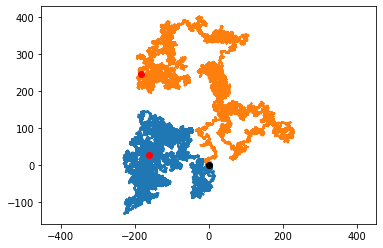

In [8]:
n=100000
X,Y=Marche1(n)
plt.plot(X,Y)
plt.plot(0,0,'o',color='black')
plt.plot(X[-1],Y[-1],'o',color='red')
X,Y=Marche2(n)
plt.plot(X,Y)
plt.plot(0,0,'o',color='black')
plt.plot(X[-1],Y[-1],'o',color='red')
plt.axis('equal')
plt.show()

### Représentation dynamique: voir l'évolution de la marche en fonction du nombre de pas

In [9]:
def Dessin(n):
    x,y=X[:n+1],Y[:n+1]
    u,v=U[:n+1],V[:n+1]
    plt.title("Trajectoire des deux marches aléatoires avec n={} pas".format(n))
    plt.plot(x,y)
    plt.plot(u,v)
    plt.plot(0,0,'o',color='black')
    plt.plot(x[n],y[n],'o',color='red')
    plt.plot(u[n],v[n],'o',color='red')
    plt.axis('equal')
    plt.show()

In [10]:
k=10000
X,Y=Marche1(k)
U,V=Marche2(k)
widgets.interact(Dessin,n=widgets.IntSlider(value=0,min=0,max=10000,step=10))

interactive(children=(IntSlider(value=0, description='n', max=10000, step=10), Output()), _dom_classes=('widge…

<function __main__.Dessin(n)>